# **Gotta Analyse 'Em All: Exploring Pokémon Types and Type Combinations**

### CSCI 2000U - Assignment 1

**Author:** Mason Shipton 
**Student Number:** 100910175
**Date:** November 25, 2024

## Table of Contents
- [Introduction](#introduction)
- [Analyses](#analyses)
  - [Importing Packages](#importing-packages)
  - [Data Loading](#data-loading)
  - [Data Cleaning](#data-cleaning)
  - [Data Manipulation](#data-manipulation)
    - [Calculating the Frequencies of First Types](#calculating-the-frequencies-of-first-types)
    - [Calculating the Frequencies of Second Types](#calculating-the-frequencies-of-second-types)
    - [Calculating the Frequencies of First and Second Type Combinations](#calculating-the-frequencies-of-first-and-second-type-combinations)
    - [Calcuating the Mean of Battle Statistics per First Type](#calculating-the-mean-of-battle-statistics-per-first-type)
    - [Finding Outliers in the Battle Statistics per First Type](#finding-outliers-in-the-battle-statistics-per-first-type)
  - [Generated Plot](#generated-plot)
    - [Bar Chart of the Frequencies of First Types](#bar-chart-of-the-frequencies-of-first-types)
    - [Bar Chart of the Frequencies of Second Types](#bar-chart-of-the-frequencies-of-second-types)
    - [Heatmap of the Frequencies of First and Second Type Combinations](#heatmap-of-the-frequencies-of-first-and-second-type-combinations)
    - [Heatmap of the Mean of Battle Statistics per First Type](#heatmap-of-the-mean-of-battle-statistics-per-first-type)
- [Discussion](#discussion)
  - [Frequencies of First Types](#frequencies-of-first-types)
  - [Frequencies of Second Types and Type Combinations](#frequencies-of-second-types-and-type-combinations)
  - [The Mean of Battle Statistics per First Type](#the-mean-of-battle-statistics-per-first-type)
  - [Dataset Limitations](#dataset-limitations)
  - [Conclusion](#conclusion)
- [References](#references)

## Introduction

![Pokemon Logo](./logo.png)
*Artwork of Generation I Pokémon (TV Tropes, n.d.)*

In a world with Star Wars, the Marvel Cinematic Universe, Harry Potter, and the Lord of the Rings, Pokémon stands tall as the highest-grossing media franchise of all time (Conte and Wadsworth, 2024). Starting from a 1996 video game on the Game Boy, the franchise has grown to span video games, trading cards, feature films, television shows, manga, comic books, and merchandise (2024). This merchandise even includes Snorlax beanbag chairs and Pokémon-themed X-ray machines (Brueheim, 2020). 

At its core, Pokémon features a world inhabited by creatures called Pokémon—unique beings containing traits of animals, plants, or even inanimate objects (The Pokémon Company, 2024). Each Pokémon boasts distinctive abilities and characteristics, and they and their attacks are categorized by types, which define their strengths and weaknesses in battle (Bulbagarden, n.d.). In total, there are eighteen types: Normal, Fire, Fighting, Water, Flying, Grass, Poison, Electric, Ground, Psychic, Rock, Ice, Bug, Dragon, Ghost, Dark, Steel, and Fairy (n.d.). Every Pokémon has one or two types, which helps balance gameplay while reflecting imaginative Pokémon designs (n.d.). For example, the famous Charizard, an orange, winged dragon-like Pokémon with a flaming tail—is classified as a Fire/Flying type. Therefore, the interplay between Pokémon types is a key factor in the franchise's enduring popularity.

This notebook aims to answer the following questions about Pokémon types:
- What are the most common first types, second types, and type combinations among Pokémon?
- Which Pokémon types and type combinations perform best or worst on average in terms of battle statistics?

To obtain the data required for this exploration, including the names, types, and battle statistics for all Pokémon, **The Complete Pokemon Dataset** (Banik, n.d.) by Rounak Banik, sourced from Kaggle was used. This dataset contains information about Pokémon from the first seven generations and does not contain information about the Pokémon from Generations VIII and IX (n.d.). Given the controversy and mixed reception surrounding these later generations (Defreitas and Kim, 2019), their exclusion is reasonable and ensures a focus on more universally embraced Pokémon. 

Through exploring these questions, this notebook seeks to provide a deeper understanding of how Pokémon types influence gameplay, highlighting the thoughtful design and strategic complexity that have sustained the franchise's global popularity for more than two decades.

## Analyses

### Importing Packages

The Pandas library (McKinney 2010) is used for reading and manipulating the Pokémon dataset. To visualize the Pokémon type data, the Seaborn (Waskom 2021) and Matplotlib (Hunter 2007) libraries are employed.

Line wrapping is disabled to ensure that all column values for an entry are printed on a single line.

In [231]:
#Imports relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.width', 1000)  #Disables line wrapping

### Data Loading

The Pokémon dataset is loaded from the local folder.

In [232]:
d = pd.read_csv('pokemon.csv') #Loads Pokémon dataset into DataFrame 'd'

### Data Cleaning

The Complete Pokémon Dataset includes 41 columns (Banik, n.d.), but only those containing information on Pokémon names, types, and battle statistics are needed for this exploration. The DataFrame is filtered to include only these relevant columns, as they are fewer in number than the unnecessary ones.

In [233]:
columns_to_keep = ["name", "type1", "type2", "attack", "defense", "hp", "sp_attack", "sp_defense", "speed", "base_total", "is_legendary"]
d_cleaned = d[columns_to_keep] #Filters 'd' to include only the columns in list 'columns_to_keep' and stores it in DataFrame 'd_cleaned'

### Data Manipulation

The frequencies of first types, second types, and type combinations are calculated. In addition, the mean and outliers for each battle statistic are determined for all first types.

##### Calculating the Frequencies of First Types

The frequency of each of the eighteen Pokémon types as the first type is calculated across all Pokémon in the dataset.

NOTE: The value_counts() method is learned from GeeksforGeeks (2024). You can access the full explanation at https://www.geeksforgeeks.org/getting-frequency-counts-of-a-columns-in-pandas-dataframe/.

In [234]:
#Calculates the frequency of each Pokémon type in the 'type1' column and stores it in Series 'first_type_frequencies'
first_type_frequencies = d_cleaned['type1'].value_counts()

print(f'Frequencies of Pokémon first types:\n{pd.DataFrame(first_type_frequencies)}')

Frequencies of Pokémon first types:
          count
type1          
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3


##### Calculating the Frequencies of Second Types

The number of Pokémon in the dataset (801) is retrieved, the number of Pokémon with a second type is calculated, and the proportion is then computed and printed.

In [235]:
num_pokemon = len(d_cleaned) #Stores the total number of Pokémon in the dataset in integer 'num_pokemon'
print(f'Number of Pokémon in the dataset: {num_pokemon}.')

#Stores the number of Pokémon whose value in 'type2' is not NaN (has a second type) in integer num_with_second_type
num_with_second_type = len(d_cleaned[d_cleaned['type2'].notna()]) 

print(f'Frequency of Pokémon with a second type: {num_with_second_type} ({round(num_with_second_type/num_pokemon * 100, 2)}% of the dataset)')

Number of Pokémon in the dataset: 801.
Frequency of Pokémon with a second type: 417 (52.06% of the dataset)


The frequency of each of the eighteen Pokémon types as the second type is calculated across all Pokémon in the dataset.

NOTE: The value_counts() method is learned from GeeksforGeeks (2024). You can access the full explanation at https://www.geeksforgeeks.org/getting-frequency-counts-of-a-columns-in-pandas-dataframe/.

In [236]:
#Calculates the frequency of each Pokémon type in the 'type2' column and stores it in Series 'second_type_frequencies'
second_type_frequencies = d_cleaned['type2'].value_counts() #Automatically ignores NaN values

print(f'Frequencies of Pokémon second types:\n{pd.DataFrame(second_type_frequencies)}')

Frequencies of Pokémon second types:
          count
type2          
flying       95
poison       34
ground       34
fairy        29
psychic      29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
ghost        14
rock         14
fire         13
electric      9
bug           5
normal        4


##### Calculating the Frequencies of First and Second Type Combinations

The frequencies of all possible first and second type combinations are calculated for all Pokémon in the dataset.

In [237]:
#Calculates the frequency of each first type and second type combination and stores it in DataFrame type_combo_frequencies
type_combo_frequencies = d_cleaned.groupby(['type1', 'type2']).size().unstack(fill_value=0) 

print(f'Frequencies of Pokémon first and second type combinations:\n{type_combo_frequencies}')

Frequencies of Pokémon first and second type combinations:
type2     bug  dark  dragon  electric  fairy  fighting  fire  flying  ghost  grass  ground  ice  normal  poison  psychic  rock  steel  water
type1                                                                                                                                       
bug         0     0       0         4      2         3     2      13      1      6       1    0       0      11        0     3      5      3
dark        0     0       4         0      0         2     2       5      1      0       0    2       0       0        2     0      2      0
dragon      0     0       0         1      0         2     1       4      0      0       4    1       0       0        2     0      0      0
electric    0     0       0         1      2         0     0       3      1      0       0    0       2       0        0     0      4      0
fairy       0     0       0         0      0         0     0       2      0      0       0    0

##### Calculating the Mean of Battle Statistics per First Type

The mean values for physical attack ('attack'), physical defense ('defense'), health ('hp'), special attack ('sp_attack'), special defense ('sp_defense'), speed ('speed'), and base stat total ('base_total') are calculated for each first type across all Pokémon in the dataset.

Only the first type was considered, as every Pokémon has a first type, whereas many (47.94%) do not have a second type. Therefore, using the first type ensures a more fair comparison.

In [238]:
#Calculates the mean value for all battle statistics for each Pokémon type in 'type1'
first_type_stat_avg = d_cleaned.groupby('type1')[['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'base_total']].mean().round(1)

print(f'The mean values of all battle statistics for each first type:\n{first_type_stat_avg}')

The mean values of all battle statistics for each first type:
          attack  defense    hp  sp_attack  sp_defense  speed  base_total
type1                                                                    
bug         70.1     70.8  56.7       56.7        62.5   63.6       380.4
dark        87.8     70.5  72.6       74.5        69.1   75.3       449.8
dragon     106.4     86.3  79.9       89.6        84.6   76.1       522.8
electric    70.8     61.8  60.5       87.5        70.1   85.4       436.2
fairy       62.1     68.2  73.9       81.5        87.8   53.7       427.2
fighting    99.2     66.4  71.4       50.1        63.4   64.3       414.8
fire        81.5     67.8  68.7       87.7        71.5   73.3       450.6
flying      66.7     65.0  68.0       84.0        70.0   99.7       453.3
ghost       72.7     79.5  63.4       82.4        78.3   58.3       434.7
grass       73.8     70.9  65.4       74.3        69.2   59.0       412.6
ground      94.8     83.9  73.2       51.9        

##### Finding Outliers in the Battle Statistics per First Type

The outliers for all battle statistics are found for each first type across all Pokémon in the dataset.

NOTE: The algorithm for calculating outliers is from STAT2010U - Statistics and Probability for Physical Science.

In [239]:
#Complete list of Pokémon types and battle statistics
types = ['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel', 'flying']
battle_stats = ["attack", "defense", "hp", "sp_attack", "sp_defense", "speed", "base_total"]

outliers_dict = {}

num_outliers = 0
num_outliers_legendary = 0
mega_evolutions = ["Venusaur", "Charizard", "Blastoise", "Beedrill", "Pidgeot", "Alakazam", "Slowbro", "Gengar", "Kangaskhan", "Pinsir", "Gyarados", "Aerodactyl", "Mewtwo", "Ampharos", "Steelix", "Scizor", "Heracross", "Houndoom", "Tyranitar", "Sceptile", "Blaziken", "Swampert", "Gardevoir", "Sableye", "Mawile", "Aggron", "Medicham", "Manectric", "Sharpedo", "Camerupt", "Altaria", "Banette", "Absol", "Glalie", "Salamence", "Metagross", "Latias", "Latios", "Lopunny", "Garchomp", "Lucario", "Abomasnow", "Audino", "Diancie"]
num_outliers_megas = 0

#Iterate through each battle statistic and Pokémon type,
#calculate the IQR, and find outliers for each type-statistic pair
for stat in battle_stats:
    for type in types:
        type_data = d_cleaned[d_cleaned['type1'] == type]
        q1 = type_data[stat].quantile(0.25) 
        q3 = type_data[stat].quantile(0.75) 
        iqr = q3 - q1 
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = type_data[(type_data[stat] < lower_bound) | (type_data[stat] > upper_bound)]
        num_outliers += len(outliers)
        num_outliers_legendary += len(outliers[outliers['is_legendary'] == 1])
        num_outliers_megas += len(outliers[outliers['name'].isin(mega_evolutions)])

        outliers_dict[(type, stat)] = outliers

print(f'Number of outliers in the battle statistics per first type: {num_outliers}\nNumber of those outliers that are legendary Pokémon: {num_outliers_legendary} ({round(num_outliers_legendary/num_outliers * 100, 2)}% of the outliers)\nNumber of those outliers that are mega-evolved Pokémon: {num_outliers_megas} ({round(num_outliers_megas/num_outliers * 100, 2)}% of the outliers)')

Number of outliers in the battle statistics per first type: 85
Number of those outliers that are legendary Pokémon: 27 (31.76% of the outliers)
Number of those outliers that are mega-evolved Pokémon: 19 (22.35% of the outliers)


### Generated Plot

Plots are created to visualize the manipulated data. Bar charts are generated to show the frequencies of first and second types. Heatmaps display the frequency of type combinations and the mean values of each battle statistic for all first types. Box plots are created to visualize the distribution of each battle statistic for all first types, with outliers described.

NOTE: The code for generating the plots in this notebook differs from the methods covered in the data visualization lectures. This approach is based on how I was taught to use Matplotlib and Seaborn during a lab internship over the summer. I used this method to create figures for papers, such as this one: https://arxiv.org/abs/2409.18472.

From Kara Brightwell (2016), a dictionary assigning a color to each Pokémon type is used to give each Pokémon type a unique color in the bar charts and box plots.

In [240]:
type_colours = {
    'normal': '#A8A77A',
    'fire': '#EE8130',
    'water': '#6390F0',
    'electric': '#F7D02C',
    'grass': '#7AC74C',
    'ice': '#96D9D6',
    'fighting': '#C22E28',
    'poison': '#A33EA1',
    'ground': '#E2BF65',
    'flying': '#A98FF3',
    'psychic': '#F95587',
    'bug': '#A6B91A',
    'rock': '#B6A136',
    'ghost': '#735797',
    'dragon': '#6F35FC',
    'dark': '#705746',
    'steel': '#B7B7CE',
    'fairy': '#D685AD'
}

##### Bar Chart of the Frequencies of First Types

Generated a bar chart displaying the frequencies of first types for all Pokémon in the dataset.

C:\Users\User\AppData\Local\Temp\ipykernel_7292\1894638550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_type_frequencies.index, y=first_type_frequencies.values, palette=type_colours)


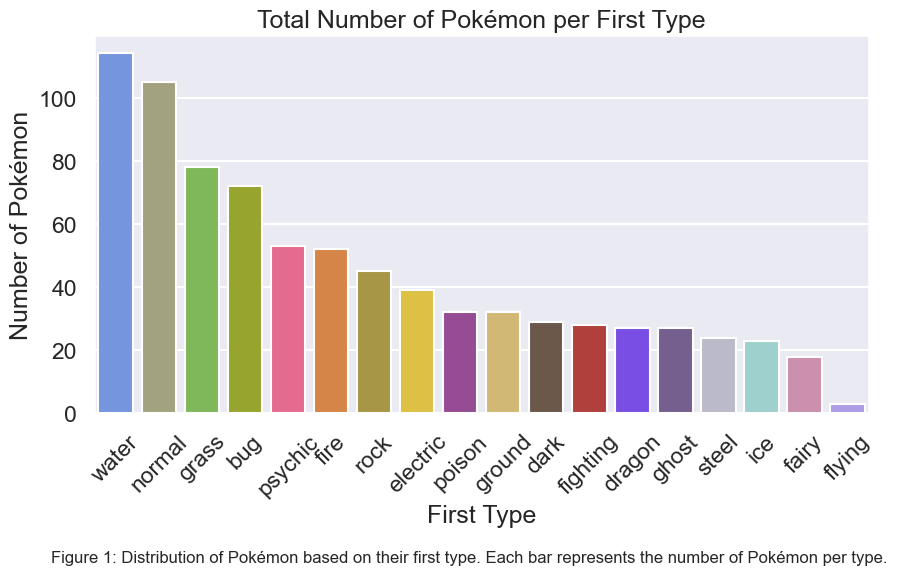

In [241]:
plt.figure(figsize=(10, 6))
sns.set_theme(context='talk', style='darkgrid')
sns.barplot(x=first_type_frequencies.index, y=first_type_frequencies.values, palette=type_colours)
plt.title('Total Number of Pokémon per First Type')
plt.xlabel('First Type')
plt.ylabel('Number of Pokémon')

plt.xticks(rotation=45)

#Figure caption
plt.subplots_adjust(bottom=0.25)
plt.figtext(0.5, 0.01, 'Figure 1: Distribution of Pokémon based on their first type. Each bar represents the number of Pokémon per type.', ha='center', va='center', fontsize=12)

plt.show()

##### Bar Chart of the Frequencies of Second Types

Generated a bar chart displaying the frequencies of second types for all Pokémon in the dataset, if applicable.

C:\Users\User\AppData\Local\Temp\ipykernel_7292\3023861362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=second_type_frequencies.index, y=second_type_frequencies.values, palette=type_colours)


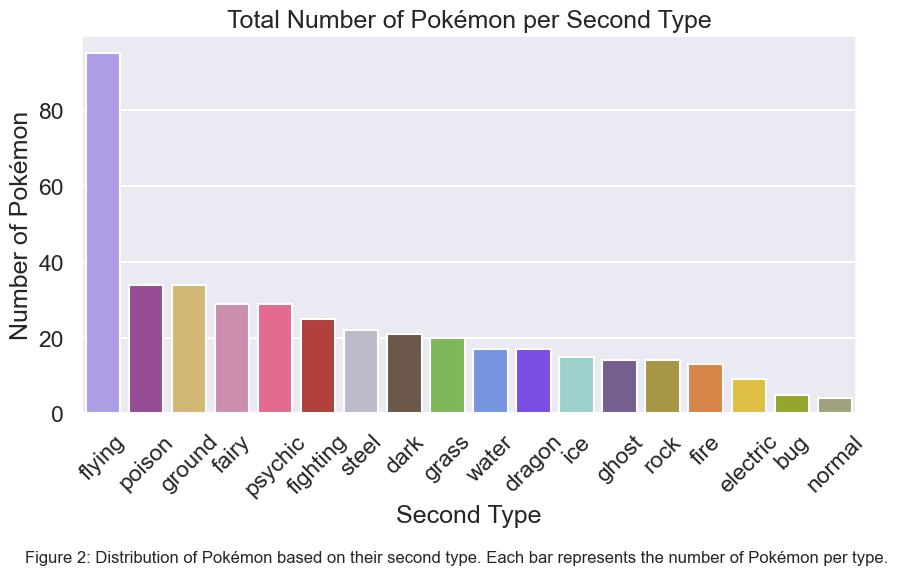

In [242]:
plt.figure(figsize=(10, 6))
sns.set_theme(context='talk', style='darkgrid')
sns.barplot(x=second_type_frequencies.index, y=second_type_frequencies.values, palette=type_colours)
plt.title('Total Number of Pokémon per Second Type')
plt.xlabel('Second Type')
plt.ylabel('Number of Pokémon')

plt.xticks(rotation=45)

#Figure caption
plt.subplots_adjust(bottom=0.25)
plt.figtext(0.5, 0.01, 'Figure 2: Distribution of Pokémon based on their second type. Each bar represents the number of Pokémon per type.', ha='center', va='center', fontsize=12)

plt.show()


##### Heatmap of the Frequencies of First and Second Type Combinations

Generated a heatmap to display the frequencies of type combinations across all Pokémon in the dataset.

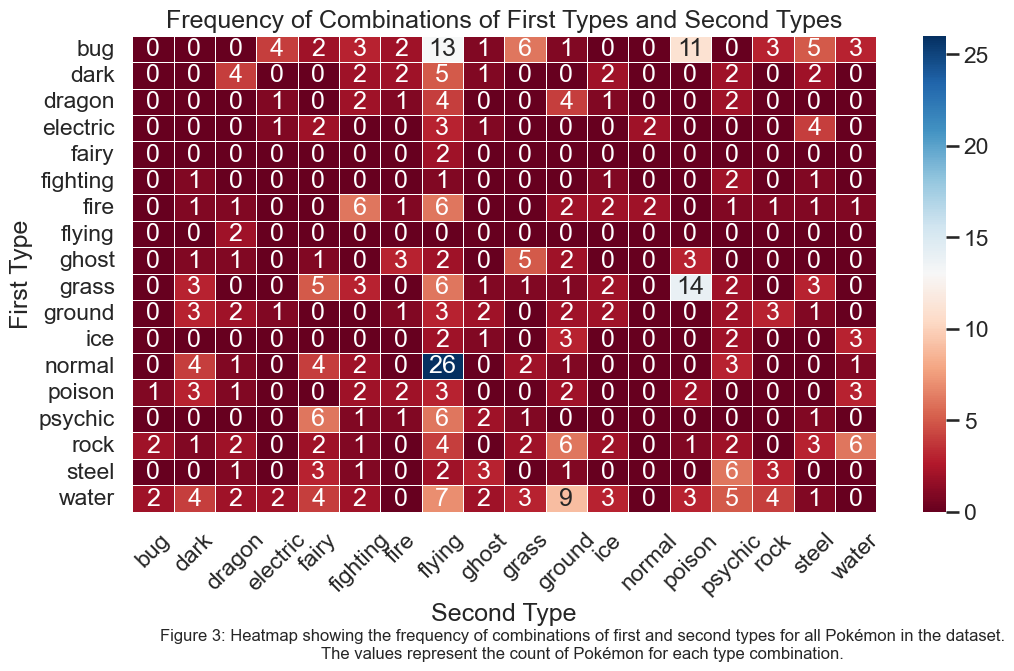

In [243]:
plt.figure(figsize=(12, 7))
sns.set_theme(context='talk', style='darkgrid')
sns.heatmap(type_combo_frequencies, annot=True, fmt="d",cmap="RdBu", linewidths=0.5)
plt.title('Frequency of Combinations of First Types and Second Types')
plt.xlabel('Second Type')
plt.ylabel('First Type')

plt.xticks(rotation=45)

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 3: Heatmap showing the frequency of combinations of first and second types for all Pokémon in the dataset.\nThe values represent the count of Pokémon for each type combination.', ha='center', va='center', fontsize=12)

plt.show()

##### Heatmap of the Mean of Battle Statistics per First Type

Generated a heatmap to display the mean values of each battle statistic for all first types across all Pokémon in the dataset.

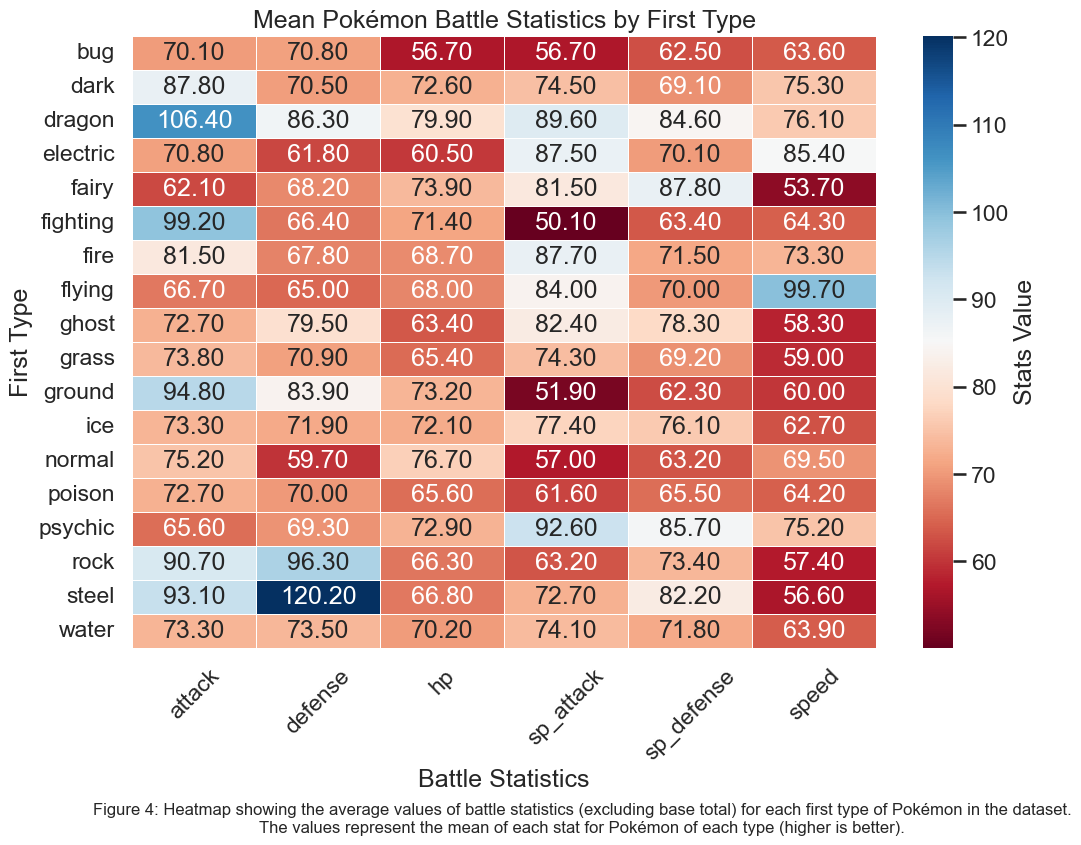

In [244]:
plt.figure(figsize=(12, 9))
sns.set_theme(context='talk', style='darkgrid')
sns.heatmap(first_type_stat_avg.drop(columns='base_total'), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Stats Value'})
plt.title('Mean Pokémon Battle Statistics by First Type')
plt.xlabel('Battle Statistics')
plt.ylabel('First Type')

plt.xticks(rotation=45)

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 4: Heatmap showing the average values of battle statistics (excluding base total) for each first type of Pokémon in the dataset.\nThe values represent the mean of each stat for Pokémon of each type (higher is better).', ha='center', va='center', fontsize=12)

plt.show()


##### Box Plot of the Mean of Physical Attack Statistics per First Type

Generated Box plots to display the distribution of each battle statistic for all first types, with outliers highlighted.

C:\Users\User\AppData\Local\Temp\ipykernel_7292\2166319454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='attack', data=d_cleaned, palette=type_colours)


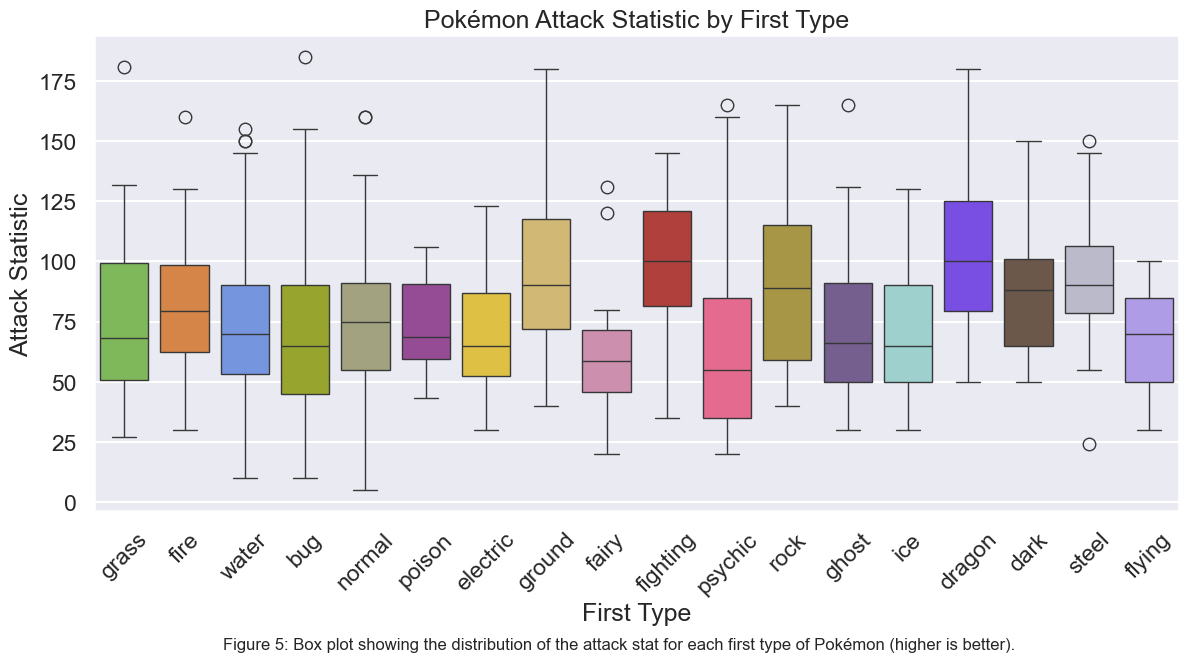

Outliers for Attack
GRASS:
        name  type1  type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
797  Kartana  grass  steel     181      131  59         59          31    109         570             1
--------------------------------------------------
FIRE:
         name type1     type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
256  Blaziken  fire  fighting     160       80  80        130          80    100         630             0
--------------------------------------------------
WATER:
         name  type1   type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
129  Gyarados  water  flying     155      109   95         70         130     81         640             0
259  Swampert  water  ground     150      110  100         95         110     70         635             0
381    Kyogre  water     NaN     150       90  100        180         160     90         770             1
--------

In [245]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='attack', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Attack Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Attack Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 5: Box plot showing the distribution of the attack stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints all the outliers
print(f"Outliers for Attack")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "attack"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)



##### Box Plot of the Mean of Physical Defense Statistics per First Type

C:\Users\User\AppData\Local\Temp\ipykernel_7292\1037826032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='defense', data=d_cleaned, palette=type_colours)


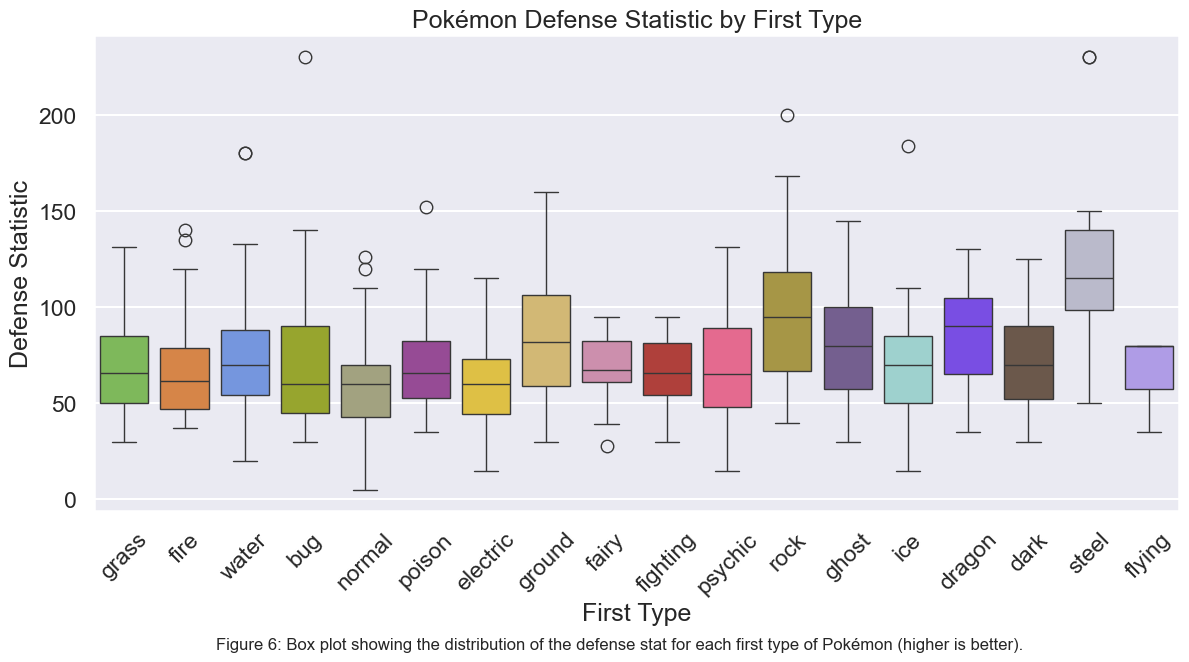

Outliers for Defense
FIRE:
           name type1   type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
323     Torkoal  fire     NaN      85      140  70         85          70     20         470             0
775  Turtonator  fire  dragon      78      135  60         91          85     36         485             0
--------------------------------------------------
WATER:
        name  type1    type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
79   Slowbro  water  psychic      75      180  95        130          80     30         590             0
90  Cloyster  water      ice      95      180  50         85          45     70         525             0
--------------------------------------------------
BUG:
        name type1 type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
212  Shuckle   bug  rock      10      230  20         10         230      5         505             0
----------------

In [246]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='defense', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Defense Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Defense Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 6: Box plot showing the distribution of the defense stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints the outliers
print(f"Outliers for Defense")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "defense"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)

##### Box Plot of the Mean of Health Statistics per First Type

C:\Users\User\AppData\Local\Temp\ipykernel_7292\3983092838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='hp', data=d_cleaned, palette=type_colours)


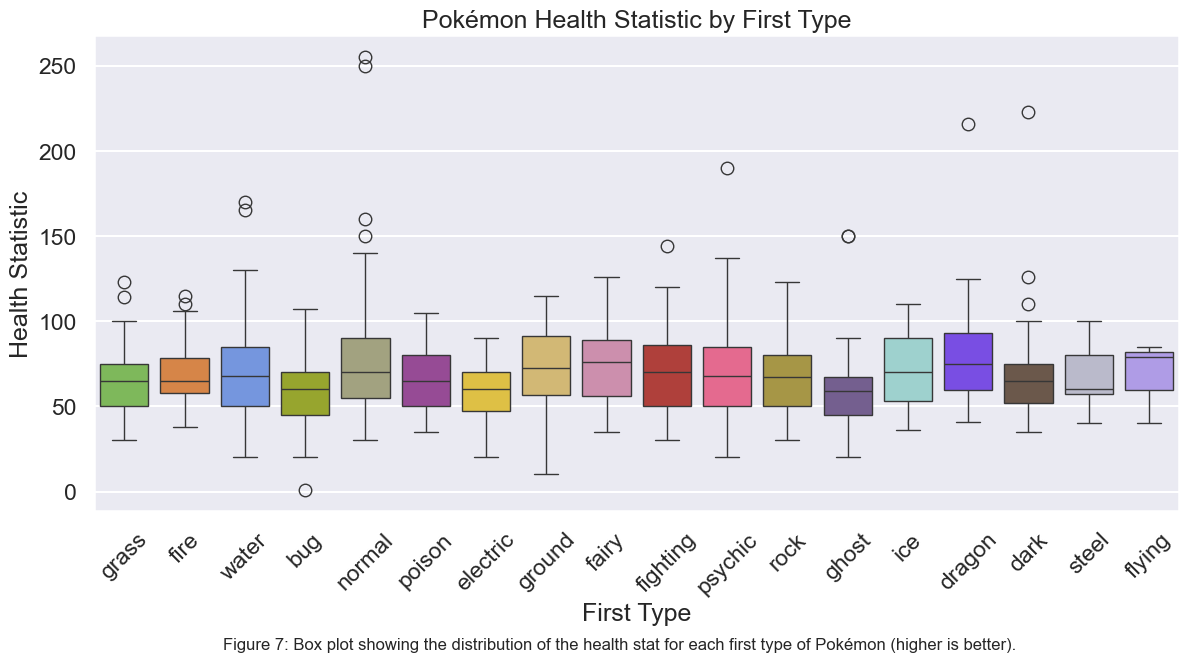

Outliers for Health
GRASS:
          name  type1   type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
590  Amoonguss  grass  poison      85       70  114         85          80     30         464             0
672     Gogoat  grass     NaN     100       62  123         97          81     68         531             0
--------------------------------------------------
FIRE:
       name type1     type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
243   Entei  fire       NaN     115       85  115         90          75    100         580             1
499  Emboar  fire  fighting     123       65  110        100          65     65         528             0
--------------------------------------------------
WATER:
          name  type1 type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
320    Wailord  water   NaN      90       45  170         90          45     60         500             0
593 

In [247]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='hp', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Health Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Health Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 7: Box plot showing the distribution of the health stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints the outliers
print(f"Outliers for Health")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "hp"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)

##### Box Plot of the Mean of Special Attack Statistics per First Type

C:\Users\User\AppData\Local\Temp\ipykernel_7292\1999641019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='sp_attack', data=d_cleaned, palette=type_colours)


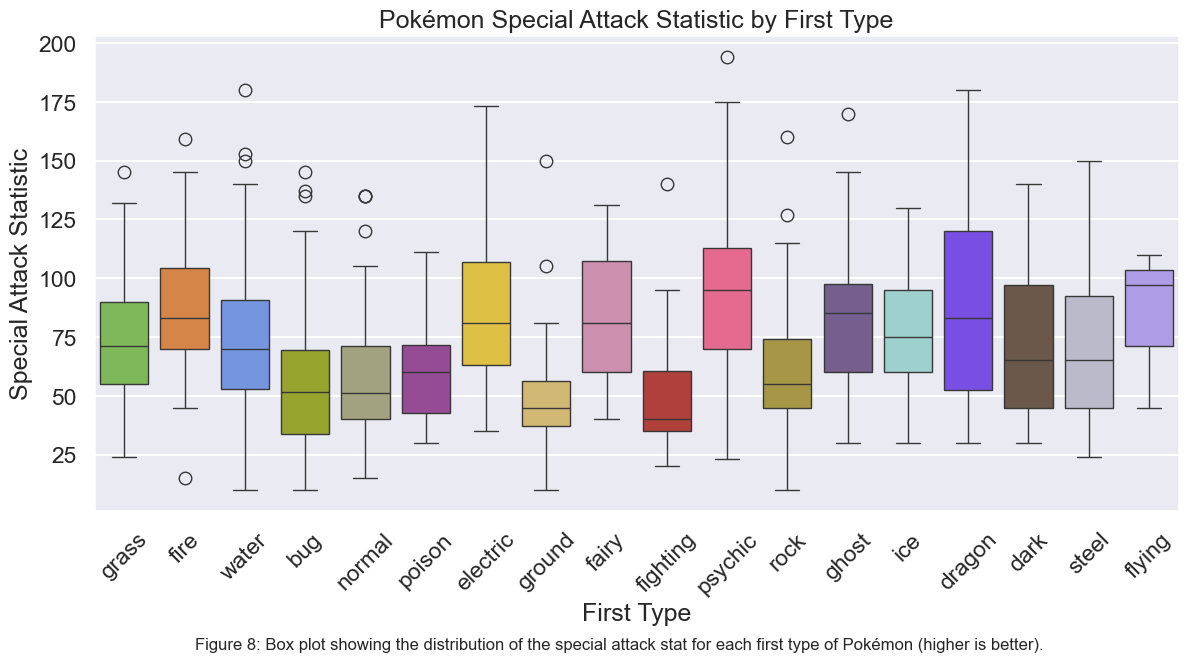

Outliers for Special Attack
GRASS:
         name  type1 type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
253  Sceptile  grass   NaN     110       75  70        145          85    145         630             0
--------------------------------------------------
FIRE:
          name type1   type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
5    Charizard  fire  flying     104       78  78        159         115    100         634             0
553   Darumaka  fire     NaN      90       45  70         15          45     50         315             0
--------------------------------------------------
WATER:
         name  type1   type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
381    Kyogre  water     NaN     150       90  100        180         160     90         770             1
483    Palkia  water  dragon     120      100   90        150         120    100         680             1
657

In [248]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='sp_attack', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Special Attack Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Special Attack Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 8: Box plot showing the distribution of the special attack stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints the outliers
print(f"Outliers for Special Attack")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "sp_attack"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)

##### Box Plot of the Mean of Special Defense Statistics per First Type

C:\Users\User\AppData\Local\Temp\ipykernel_7292\1586095647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='sp_defense', data=d_cleaned, palette=type_colours)


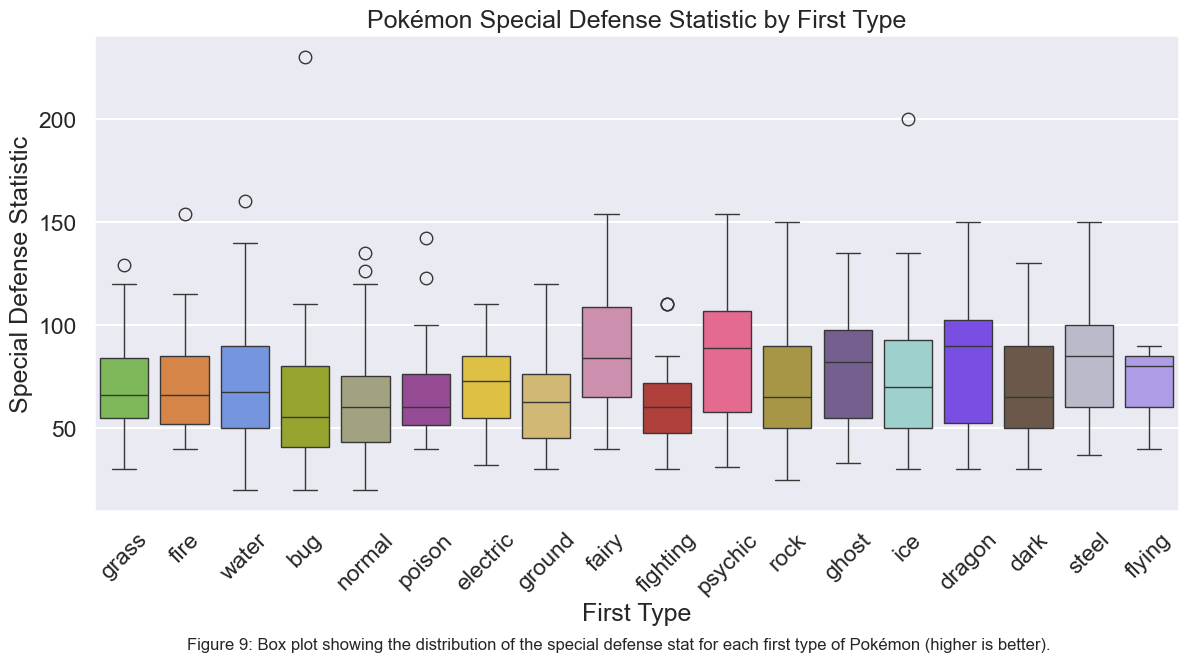

Outliers for Special Defense
GRASS:
         name  type1     type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
639  Virizion  grass  fighting      90       72  91         90         129    108         580             1
--------------------------------------------------
FIRE:
      name type1   type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
249  Ho-Oh  fire  flying     130       90  106        110         154     90         680             1
--------------------------------------------------
WATER:
       name  type1 type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
381  Kyogre  water   NaN     150       90  100        180         160     90         770             1
--------------------------------------------------
BUG:
        name type1 type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
212  Shuckle   bug  rock      10      230  20         10       

In [249]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='sp_defense', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Special Defense Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Special Defense Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 9: Box plot showing the distribution of the special defense stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints the outliers
print(f"Outliers for Special Defense")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "sp_defense"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)

##### Box Plot of the Mean of Speed Statistics per First Type

C:\Users\User\AppData\Local\Temp\ipykernel_7292\1925584229.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='speed', data=d_cleaned, palette=type_colours)


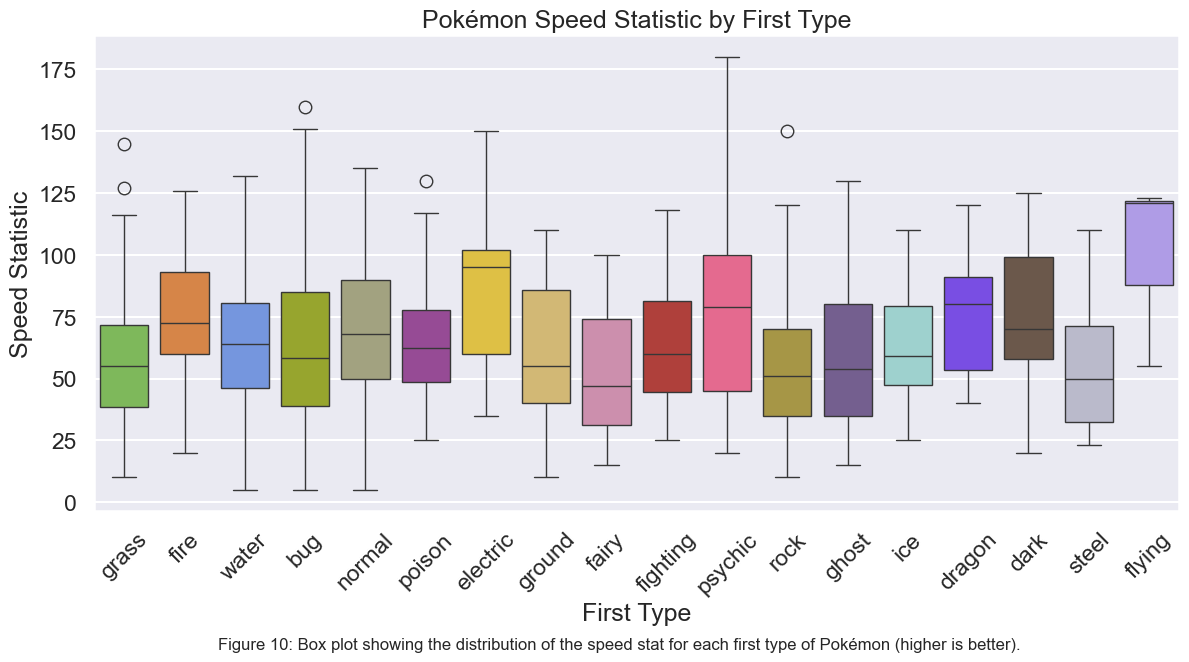

Outliers for Speed
GRASS:
         name  type1  type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
253  Sceptile  grass    NaN     110       75   70        145          85    145         630             0
491   Shaymin  grass  grass     103       75  100        120          75    127         600             1
--------------------------------------------------
BUG:
        name type1   type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
290  Ninjask   bug  flying      90       45  61         50          50    160         456             0
--------------------------------------------------
POISON:
       name   type1   type2  attack  defense  hp  sp_attack  sp_defense  speed  base_total  is_legendary
168  Crobat  poison  flying      90       80  85         70          80    130         535             0
--------------------------------------------------
ROCK:
           name type1   type2  attack  defense  hp  sp_attack  sp_

In [250]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='speed', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Speed Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Speed Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 10: Box plot showing the distribution of the speed stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints the outliers
print(f"Outliers for Speed")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "speed"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)

##### Box Plot of the Mean of Base Stat Total Statistics per First Type

C:\Users\User\AppData\Local\Temp\ipykernel_7292\306935475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='base_total', data=d_cleaned, palette=type_colours)


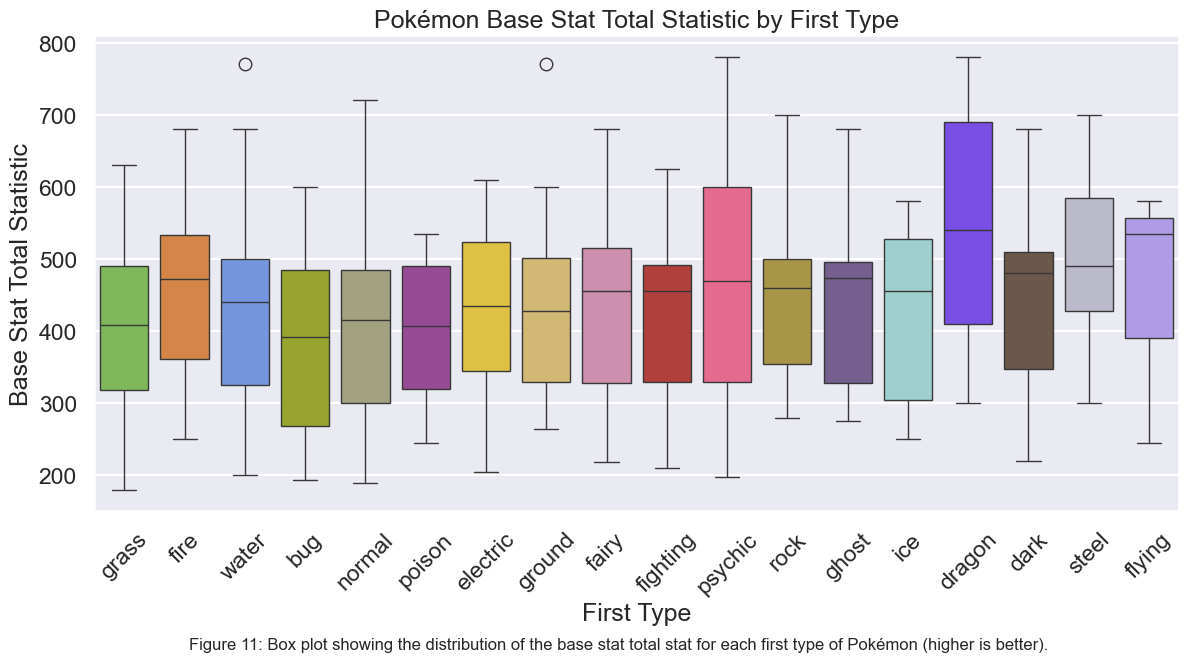

Outliers for Base Stat Total
WATER:
       name  type1 type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
381  Kyogre  water   NaN     150       90  100        180         160     90         770             1
--------------------------------------------------
GROUND:
        name   type1 type2  attack  defense   hp  sp_attack  sp_defense  speed  base_total  is_legendary
382  Groudon  ground   NaN     180      160  100        150          90     90         770             1
--------------------------------------------------


In [251]:
plt.figure(figsize=(14, 7))
sns.set_theme(context='talk', style='darkgrid')

sns.boxplot(x='type1', y='base_total', data=d_cleaned, palette=type_colours)

plt.title("Pokémon Base Stat Total Statistic by First Type")

plt.xlabel("First Type")  
plt.ylabel("Base Stat Total Statistic") 

plt.xticks(rotation=45) 

#Figure caption
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.01, 'Figure 11: Box plot showing the distribution of the base stat total stat for each first type of Pokémon (higher is better).', ha='center', va='center', fontsize=12)

plt.show()

#Prints the outliers
print(f"Outliers for Base Stat Total")
for pokemon_type in types:
    outlier_data = outliers_dict.get((pokemon_type, "base_total"), None)
    if outlier_data is not None and not outlier_data.empty:
        print(f"{pokemon_type.upper()}:")
        print(outlier_data)
        print("-" * 50)

## Discussion

The frequencies of Pokémon first types, second types, and type combinations have been calculated, so has the mean battle statistics for each first type and their outliers. Plots have been created to illustrate these distributions, averages, and outliers. From this, insights can be revealed into the diversity of Pokémon types and the relationships between these types and the statistics that influence their performance in battles

### Frequencies of First Types

Per Figure 1, Water and Normal types are the most frequent first types among Pokémon in the dataset. This is logical from a game design perspective, as these types are often based on real-life aquatic creatures and mammals, respectively. This makes it easier to create many Pokémon of these types. Similarly, Bug and Grass types, the next most frequent, are overwhemingly inspired by real-life insects and plants.

Conversely, Ice, Fairy, and Flying are the least frequent first types. For Ice, many Ice-type Pokémon are based on inanimate objects or mythical creatures (e.g., Lapras, inspired by the Loch Ness Monster, and Abomasnow, inspired by the Yeti), making it harder to create as many Ice-type Pokémon. In addition, Ice often appears as a secondary type, such as with Dewgong and Cloyster. The Fairy type, introduced in Generation VI, tends to be a secondary type as well, further contributing to its rarity. Although Flying types are primarily inspired by birds and are easy to create, they are by and large assigned as a secondary type (e.g., Normal-Flying and Bug-Flying combinations), which explains their low frequency as a first type.

### Frequencies of Second Types and Type Combinations

As can be seen in Figure 2, Flying is the most frequent second type among Pokémon in the dataset. The reason for this is present in Figure 3, which is that Flying as a second type overwhelmingly dominates type combinations, with Normal-Flying and Bug-Flying being the most frequent and third most frequent type combinations, respectively. Likewise, Poison and Ground, which are tied for second most frequent secondary type, are the second type in the other top five most frequent type combinations.

The Normal and Electric types are among the least frequent second types, as Pokémon of these types are often single-typed. Bug-type Pokémon, while frequently having two types, rarely have Bug as their second type. Many Bug-type Pokémon begin with Bug as their single type and then gain a secondary type upon evolution, often Poison or Flying, in accordance with Figure 3.

It's clear from Figure 3 that there are a lot of Pokémon type combinations that have not been used per Generation VII. There are few combinations with Fairy, Flying, and Fighting as the first type, and there are few combinations with Bug, Electric, and Normal as the second type. There are specific type combinations which could have incredible potential in competitive Pokémon battles that have yet to be implemented. A Ground-Fairy Pokémon for example would be immune to Electric and Dragon type attacks. 

### The Mean of Battle Statistics per First Type

Dragon-type Pokémon excel in several categories, with the highest mean physical attack and health statistics and the second-highest special attack. Fighting ranks second in physical attack, while Steel and Rock have the top two physical defense statistics. Psychic leads in special attack, followed by Dragon, and Fairy tops special defense, followed by Psychic. Flying has the highest speed, with Electric in second place.

On the other end, Fairy has the lowest mean physical attack, followed by Psychic. Normal has the weakest physical defense, with Electric close behind. Bug has the lowest health, a bit ahead of Electric. Fighting and Ground occupy the bottom two spots for special attack, while Ground and Bug have the lowest special defense. Fairy and Steel hold the lowest mean speed statistics.

Notably, Dragon excels across multiple categories, with top-two rankings in three statistics. Figure 11 further highlights the dominance of Dragon-types in their base stat totals, showcasing both the best mean and the best distribution. Dragon-types range from a minimum base stat total of 300 to a maximum of 780, explaining their prominence in competitive play.

From Generations I–III, move types were tied exclusively to physical or special attack categories (Bulbagarden, n.d.). Normal-, Fighting-, Flying-, Poison-, Ground-, Rock-, Bug-, Ghost-, and Steel-type moves were always physical (n.d.). Fire-, Water-, Grass-, Electric-, Psychic-, Ice-, Dragon-, Dark-, and Fairy-type moves were always special (n.d.). This system influenced Pokémon designs, with their stats optimized for corresponding moves. While this changed in Generation IV, remnants of these patterns persist. In Figure 4, Pokémon's best attack statistic (physical or special) aligned with the attack statistic of it's type in generations prior to Generation IV. The few exceptions to this pattern is Dark and Dragon types, which have higher physical attack than special attack, and Ghost types, whose best move, Shadow Ball, was changed from a physical attack move to a special attack move in Generation IV.

The box plot distributions in Figures 5 to 11 largely align with the means but highlight significant outliers. Approximately 31.76% of outliers are legendary Pokémon, whose exceptional stats reflect their rarity. Other outliers have one exceptional stat only to play a specialized role. For example, Ninjask is an outlier for the speed statistic for Bug-type Pokémon, however Ninjask's niche is that it is a glass-cannon. Ninjask is fast and can do a lot of damage or set-up, however is very weak defensively and can be knocked out easily. In the reverse, Shuckle plays a purely defensive role, with very high defense and special defense statistics, however horrible attack, special attack, and speed statistics. 

Mega Evolutions account for 22.35% of outliers. These forms drastically increase specific stats, such as Mega Sceptile's special attack (boosted from 105 to 145), making it an outlier among Grass types. However, the dataset does not distinguish mega-evolved Pokémon, replacing their base form instead, which could lead to inaccuracies.

### Dataset Limitations

While comprehensive, the Complete Pokémon Dataset has some shortcomings. There are columns absent indicating whether a Pokémon is mega-evolved or mythical, categorizing mythical Pokémon incorrectly as legendary. Mythical Pokémon differ from legendary ones in availability: mythical Pokémon are not obtainable in-game, while legendary Pokémon are typically limited to one per game. In addition, the dataset has yet been updated to include Pokémon from Generations VIII and IX. Despite these issues, the Complete Pokémon Dataset remains an invaluable resource for detailed Pokémon analysis and I hope for these issues to be resolved for more up-to-date analysis.

### Conclusion

We successfully determined the most frequent first types, second types, and type combinations among Pokémon in the dataset. In doing so, we identified unused type combinations with significant competitive potential. We found examined which Pokémon types and type combinations perform best or worst on average in terms of battle statistics and explored the niche competitive roles certain Pokémon are designed to fulfill. Furthermore, we identified flaws in the Complete Pokémon Dataset, such as the absence of distinctions for mega evolutions and mythical Pokémon, which, if addressed, could enable more detailed and up-to-date analyses. These findings contribute valuable insights into Pokémon design and gameplay, highlighting the creativity and hard work Nintendo and GameFreak have put into this franchise for over 25 years.

## References

### Dataset

Banik, Rounak. "The Complete Pokemon Dataset". Last modified 2016. *Kaggle*. Accessed November 20, 2024. https://www.kaggle.com/datasets/rounakbanik/pokemon/data

### Logo

TV Tropes. "Pokémon (Franchise)". *TV Tropes*. n.d. Accessed November 24, 2024. https://tvtropes.org/pmwiki/pmwiki.php/Franchise/Pokemon.

### Sources

Brightwell, Kara. 2016. "pokemon-type-colours.js". *GitHub Gist*. https://gist.github.com/apaleslimghost/0d25ec801ca4fc43317bcff298af43c3.

Brueheim, Jackson. 2020. "Snorlax Bean Bag Chair (& 9 Other Weird Pieces Of Pokémon Merchandise)". *CBR*. https://www.cbr.com/pokemon-snorlax-bean-bag-chair-merchandise/.

Bulbagarden. "Type". *Bulbagarden*. n.d. Accessed November 24, 2024. https://bulbapedia.bulbagarden.net/wiki/Type.

Conte, Niccolo, and Wadsworth, Clayton. 2024. "The World’s Top Media Franchises by All-Time Revenue". *Visual Capitalist*. https://www.visualcapitalist.com/the-worlds-top-media-franchises-by-all-time-revenue/.

DeFreitas, Casey, and Matt Kim. 2020. "Pokemon Sword and Shield Controversy and 'Dexit,' Explained: Pokemon Sword and Shield's Very Long Year." *IGN*. Last updated January 13, 2020. https://www.ign.com/articles/2019/11/16/pokemon-sword-and-shield-dexit-controversy-explained.

GeeksforGeeks. 2024. "Getting Frequency Counts of a Column in Pandas DataFrame." *GeeksforGeeks*. https://www.geeksforgeeks.org/getting-frequency-counts-of-a-columns-in-pandas-dataframe/.

The Pokémon Company. 2024. "Pokémon Is". *The Pokémon Company*. https://parents.pokemon.com/en-us/#pokemonBasics.

Hunter, John D. 2007. "Matplotlib: A 2D Graphics Environment." *Computing in Science & Engineering*. https://doi.org/10.1109/MCSE.2007.55.

McKinney, Wes. 2010. "Data Structures for Statistical Computing in Python." *Proceedings of the 9th Python in Science Conference*. https://doi.org/10.25080/Majora-92bf1922-00a.

Waskom, Michael L. 2021. "Seaborn: Statistical Data Visualization." *Journal of Open Source Software*. https://doi.org/10.21105/joss.03021.